In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
import copy
%matplotlib inline

In [2]:
snp = pd.read_csv("snp_500_2015_2019.csv")
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)

In [9]:
print(adfuller(snp_close)[1])

0.6675983326694308
<class 'pandas.core.frame.DataFrame'>


# 1.2.1

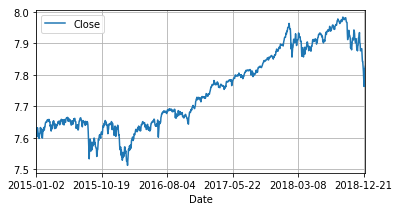

In [55]:

snp_close.plot(figsize = (5.9,3))
plt.grid()
plt.savefig("121.eps",dpi=1200)


# 1.2.2

In [5]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,0,0)).fit()
snp_arma["Res"] = model.resid
snp_arma["Prediction"] = snp_arma["True"] - snp_arma["Res"]
print(model.params)

const         7.739997
ar.L1.True    0.997359
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [86]:
# print(snp_arma)
sig_squared = snp_arma['True']**2
noise_squared = snp_arma['Res']**2

sig_rms = np.sqrt(np.mean(sig_squared))
noise_rms = np.sqrt(np.mean(noise_squared))

snr = 10*np.log10((sig_rms/noise_rms)**2)
print(snr)


58.42720646431566


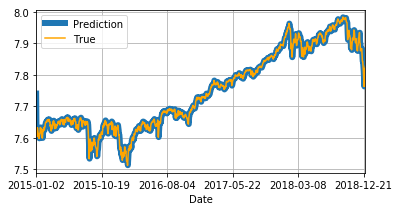

In [61]:
plt.figure(figsize = (5.9,3))
# plt.plot(snp_arma["Prediction"])
snp_arma["Prediction"].plot(linewidth=6, linestyle='solid')
snp_arma["True"].plot(color = "orange",linewidth=1.5, linestyle='-')
# plt.plot(snp_arma["True"])
plt.grid()
plt.legend(["Prediction", "True"])
plt.savefig("122.eps", dpi=1200)

# 1.2.3

In [87]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
model = ARIMA(snp_arima, order=(1,1,0)).fit()
snp_arima["Res"] = model.resid
snp_arima["Prediction"] = snp_arima["True"] - snp_arima["Res"]
print(model.params)

const           0.000196
ar.L1.D.True   -0.008752
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [88]:
sig_squared = snp_arima['True']**2
noise_squared = snp_arima['Res']**2

sig_rms = np.sqrt(np.mean(sig_squared))
noise_rms = np.sqrt(np.mean(noise_squared))

snr = 10*np.log10((sig_rms/noise_rms)**2)
print(snr)

59.076989113866006


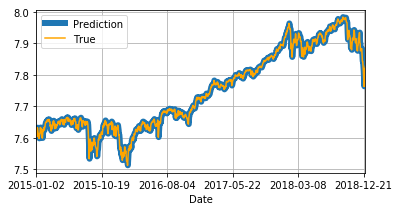

In [89]:
plt.figure(figsize = (5.9,3))
snp_arima["Prediction"].plot(linewidth=6, linestyle='solid')
snp_arima["True"].plot(color = "orange",linewidth=1.5, linestyle='-')
plt.grid()
plt.legend(["Prediction", "True"])
plt.savefig("123.eps", dpi=1200)